# Distribution of DateTime, user type and dutation of trips
## by (Eric Munene)


## Investigation Overview
>In this investigation, I look at how the duration of trips changes with respect to time and user type type. The main focus was on frequencies of hours, days and user type.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The dataset has 174952 entries with 22 columns after data wrangling.

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
df_bike =pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [26]:
#drop all the null values
df_bike.dropna(inplace=True)

#Convert the columns to datetime
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

#Convert the columns to datetime
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
df_bike['start_hr'] = df_bike['start_time'].dt.hour
df_bike['start_hr'] = df_bike.start_hr.astype(str)


df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()
df_bike['end_hr'] = df_bike['end_time'].dt.hour
df_bike['end_hr'] = df_bike.end_hr.astype(str)

# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_bike[var] = df_bike[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

##  Ride frequency per hour

> The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.

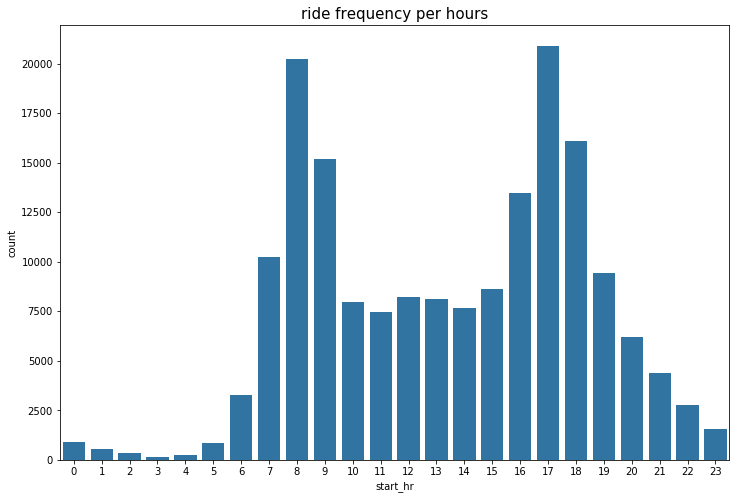

In [27]:
# ride frequency per hours

fig= plt.subplots(figsize = (12,8))

plt.title('ride frequency per hours', fontsize=15)
base_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_hr', color = base_color)

## Ride frequency by days

> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

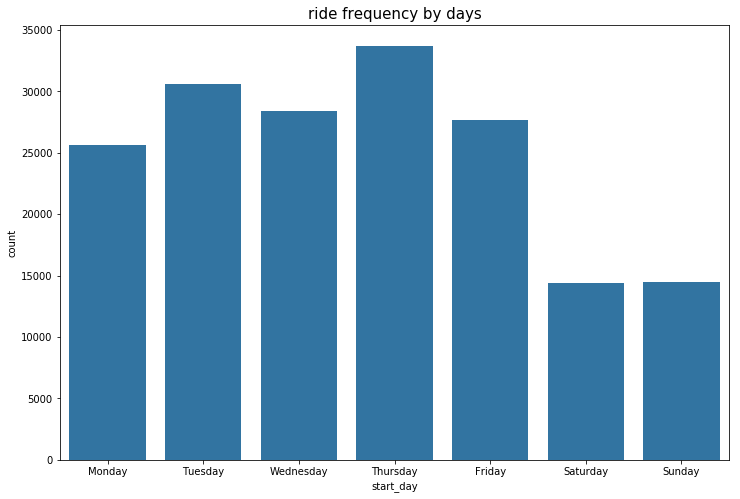

In [28]:
# ride frequency per days

fig = plt.subplots(figsize = (12,8))

plt.title('ride frequency by days', fontsize=15)
base_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_day', color = base_color)

## Trip duration variation on user types on daily usage
> Subscribers have short trip duration compared to customers on each day of the week. Both user_type have increase in trip duration on weekends that is Saturday and Sunday



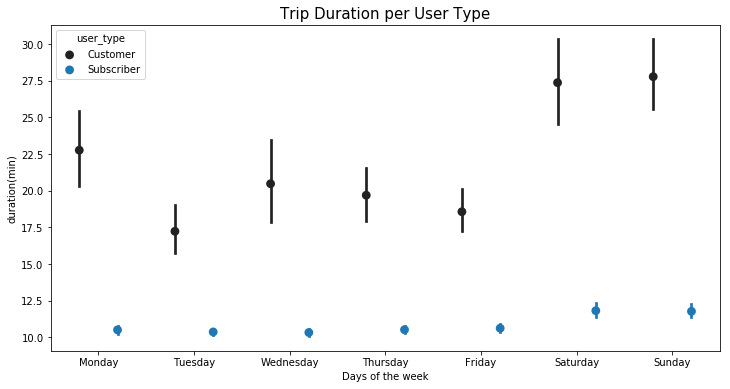

In [29]:
df_bike['duration_minute'] = df_bike['duration_sec']/60
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = df_bike, x ='start_day', y = 'duration_minute', hue = 'user_type',
           color= base_color, linestyles = '', dodge = 0.4)
plt.xlabel('Days of the week')
plt.ylabel('duration(min)')
plt.title('Trip Duration per User Type', fontsize=15)

ax.set_yticklabels([],minor = True);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [31]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 341610 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/s

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
